In [6]:
library(factoextra)
library(hrbrthemes)
library(ggplot2)


Loading required package: ggplot2



Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow



In [7]:
df <- read.csv("ds-final.csv")

In [8]:
summary(df)

      Age            Gender      Air.Pollution   Alcohol.use     Dust.Allergy  
 Min.   :14.00   Min.   :1.000   Min.   :1.00   Min.   :1.000   Min.   :1.000  
 1st Qu.:27.75   1st Qu.:1.000   1st Qu.:2.00   1st Qu.:2.000   1st Qu.:4.000  
 Median :36.00   Median :1.000   Median :3.00   Median :5.000   Median :6.000  
 Mean   :37.17   Mean   :1.402   Mean   :3.84   Mean   :4.563   Mean   :5.165  
 3rd Qu.:45.00   3rd Qu.:2.000   3rd Qu.:6.00   3rd Qu.:7.000   3rd Qu.:7.000  
 Max.   :73.00   Max.   :2.000   Max.   :8.00   Max.   :8.000   Max.   :8.000  
 OccuPational.Hazards  Genetic.Risk  chronic.Lung.Disease Balanced.Diet  
 Min.   :1.00         Min.   :1.00   Min.   :1.00         Min.   :1.000  
 1st Qu.:3.00         1st Qu.:2.00   1st Qu.:3.00         1st Qu.:2.000  
 Median :5.00         Median :5.00   Median :4.00         Median :4.000  
 Mean   :4.84         Mean   :4.58   Mean   :4.38         Mean   :4.491  
 3rd Qu.:7.00         3rd Qu.:7.00   3rd Qu.:6.00         3rd Qu.:7.00

In [44]:
row_counts <- table(apply(df, 1, paste, collapse = ","))

# Mostrar el resultado
print("With no dups:", dim(row_counts))
head(row_counts)

[1] 152



14,1,2,4,5,6,5,5,4,6,5,4,6,5,5,3,2,1,4,7,2,1,6,2 
                                               9 
17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,2 
                                              10 
17,2,1,2,3,4,4,3,2,1,3,2,1,2,1,3,3,2,1,3,2,1,1,1 
                                              10 
18,2,3,2,1,3,2,1,3,2,1,2,2,2,2,2,1,3,4,4,1,4,1,1 
                                               9 
18,2,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,3 
                                               9 
19,1,3,2,4,2,3,2,3,3,2,2,3,3,4,5,6,5,5,4,6,5,4,2 
                                              10 

# Clustering

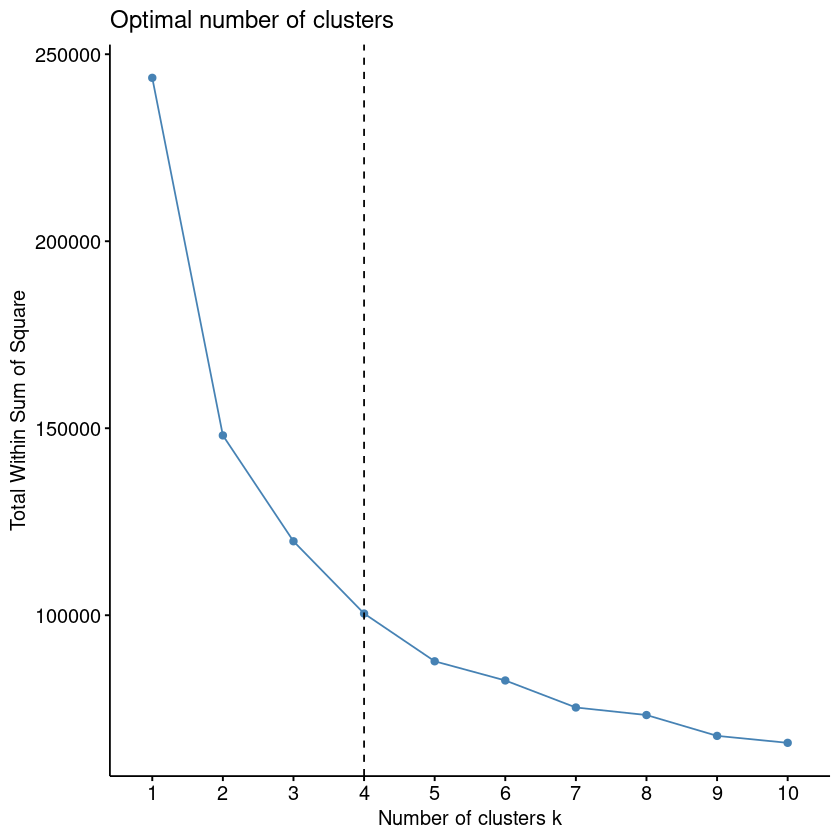

In [9]:
fviz_nbclust(df, kmeans, method = "wss") + geom_vline(xintercept = 4, linetype = 2)

In [10]:
k <- 4
kmeans_result <- kmeans(df, centers = k)

print(kmeans_result)

K-means clustering with 4 clusters of sizes 244, 225, 335, 196

Cluster means:
       Age   Gender Air.Pollution Alcohol.use Dust.Allergy OccuPational.Hazards
1 40.16393 1.450820      2.094262    2.290984     3.778689             3.090164
2 53.84444 1.208889      4.773333    5.795556     5.648889             5.573333
3 31.88060 1.379104      5.164179    6.701493     6.674627             6.558209
4 23.36224 1.602041      2.678571    2.321429     3.755102             3.239796
  Genetic.Risk chronic.Lung.Disease Balanced.Diet  Obesity  Smoking
1     2.573770             3.000000      2.709016 2.954918 2.655738
2     5.453333             5.066667      4.937778 5.071111 4.435556
3     6.352239             5.850746      6.349254 6.074627 5.489552
4     3.045918             2.795918      3.020408 2.897959 2.362245
  Passive.Smoker Chest.Pain Coughing.of.Blood  Fatigue Weight.Loss
1       3.159836   2.516393          3.315574 3.684426    3.913934
2       4.342222   4.977778          5.497778 4

## Number of cluster for each instance

In [11]:
head(kmeans_result$cluster)


[1] 1 4 3 3 2 3

In [12]:
df_with_cluster <- cbind(df, cluster = kmeans_result$cluster)

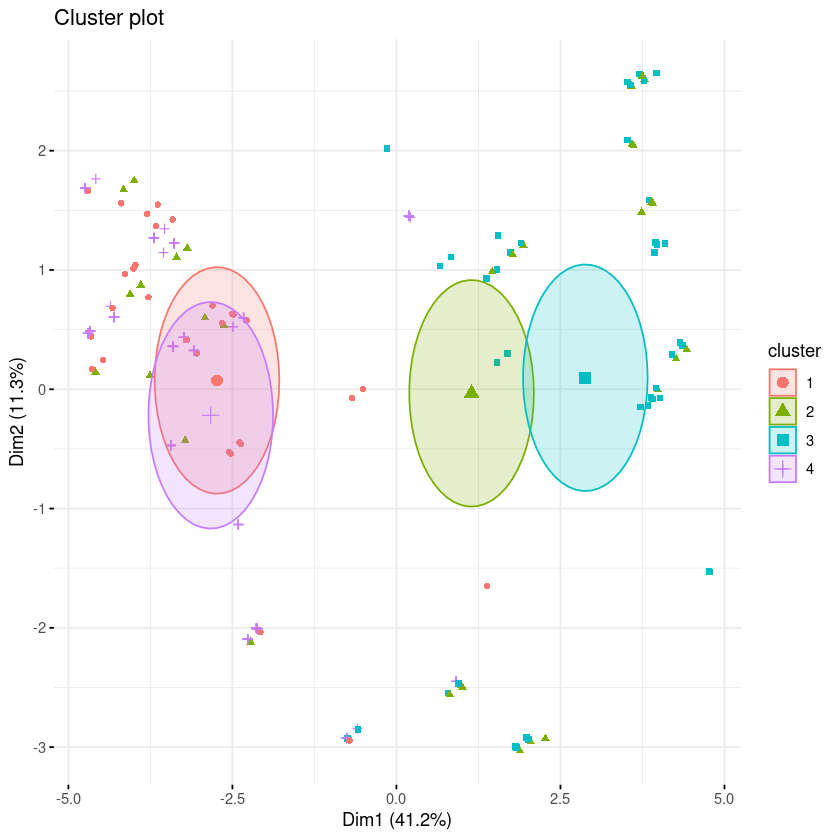

In [13]:
fviz_cluster(kmeans_result, data = df,
        ellipse.type = "euclid", # Concentration ellipse
        #star.plot = TRUE, # Add segments from centroids to items
        repel = TRUE, # Avoid label overplotting (slow)
        ggtheme = theme_minimal(),
        geom = "point"
)

# t-SNE

In [14]:
library(Rtsne)


In [21]:
# Check for duplicate rows
duplicates <- duplicated(df)

dim(df)
# Remove duplicate rows
df_no_duplicates <- df[!duplicates, ]

dim(df_no_duplicates)

[1] 1000   24

[1] 152  24

In [26]:
tsne_result <- Rtsne(as.matrix(df_no_duplicates), dims = 2, perplexity = 30, theta = 0.5, max_iter = 1000)

# 'dims' es la cantidad de dimensiones en la que deseas reducir tus datos, generalmente 2 para visualización.
# 'perplexity' es un hiperparámetro que controla la distribución de probabilidad de vecindad.
# 'theta' es un hiperparámetro que controla la velocidad de convergencia.
# 'max_iter' es el número máximo de iteraciones para el algoritmo.
#tsne_result


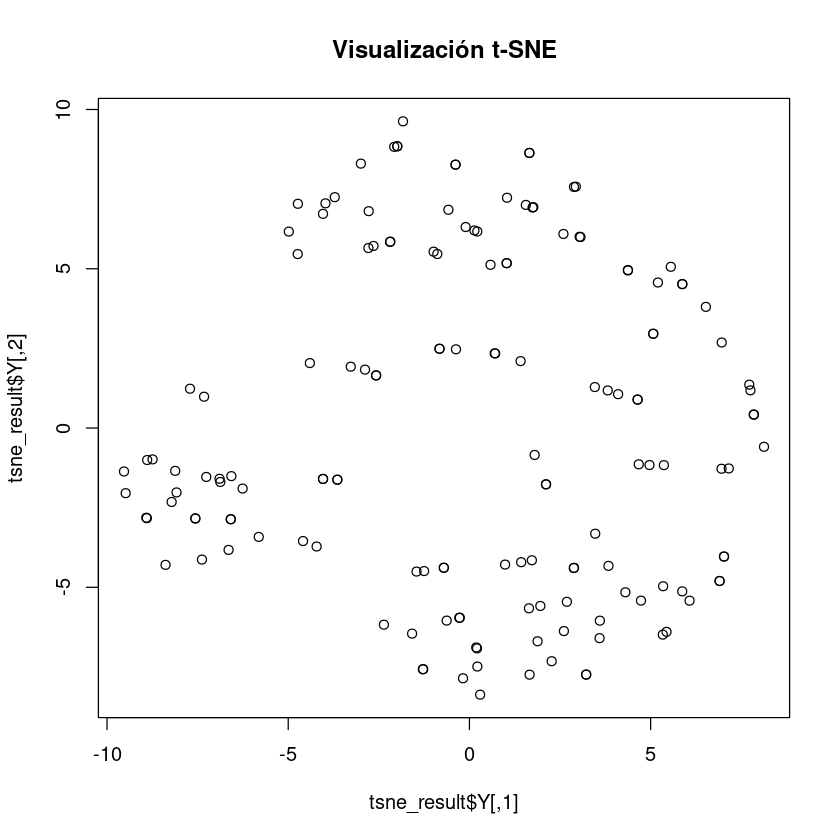

In [23]:
# El resultado estará en tsne_result$Y, que contendrá las coordenadas t-SNE reducidas.

# Visualizar los resultados
plot(tsne_result$Y, main = "Visualización t-SNE")

In [28]:
kmeans_result_no_dups <- kmeans(df_no_duplicates, centers = k)


In [29]:
df_no_duplicates_cluster <- cbind(df_no_duplicates, cluster = kmeans_result_no_dups$cluster)

In [36]:
head(df_no_duplicates_cluster)

,Age,Gender,Air.Pollution,Alcohol.use,Dust.Allergy,OccuPational.Hazards,Genetic.Risk,chronic.Lung.Disease,Balanced.Diet,Obesity,⋯,Weight.Loss,Shortness.of.Breath,Wheezing,Swallowing.Difficulty,Clubbing.of.Finger.Nails,Frequent.Cold,Dry.Cough,Snoring,Level,cluster
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,33,1,2,4,5,4,3,2,2,4,⋯,4,2,2,3,1,2,3,4,1,1
2,17,1,3,1,5,3,4,2,2,2,⋯,3,7,8,6,2,1,7,2,2,1
3,35,1,4,5,6,5,5,4,6,7,⋯,7,9,2,1,4,6,7,2,3,4
4,37,1,7,7,7,7,6,7,7,7,⋯,2,3,1,4,5,6,7,5,3,4
5,46,1,6,8,7,7,7,6,7,7,⋯,2,4,1,4,2,4,2,3,3,3
7,52,2,2,4,5,4,3,2,2,4,⋯,4,2,2,3,1,2,3,4,1,2


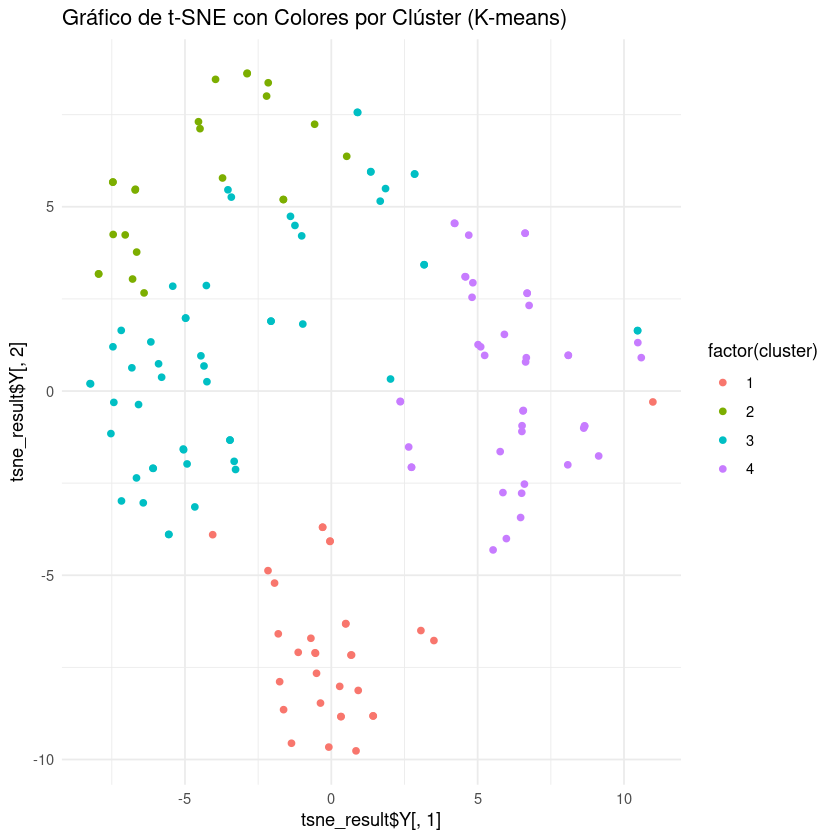

In [38]:
ggplot(df_no_duplicates_cluster, aes(x = tsne_result$Y[, 1], y = tsne_result$Y[, 2], color = factor(cluster))) +
geom_point() +
labs(title = "Gráfico de t-SNE con Colores por Clúster (K-means)") +
theme_minimal()

## PCA

In [ ]:
pca_result <- prcomp(df, center = TRUE, scale. = TRUE)
dim(pca_result$x)

[1] 1000   24

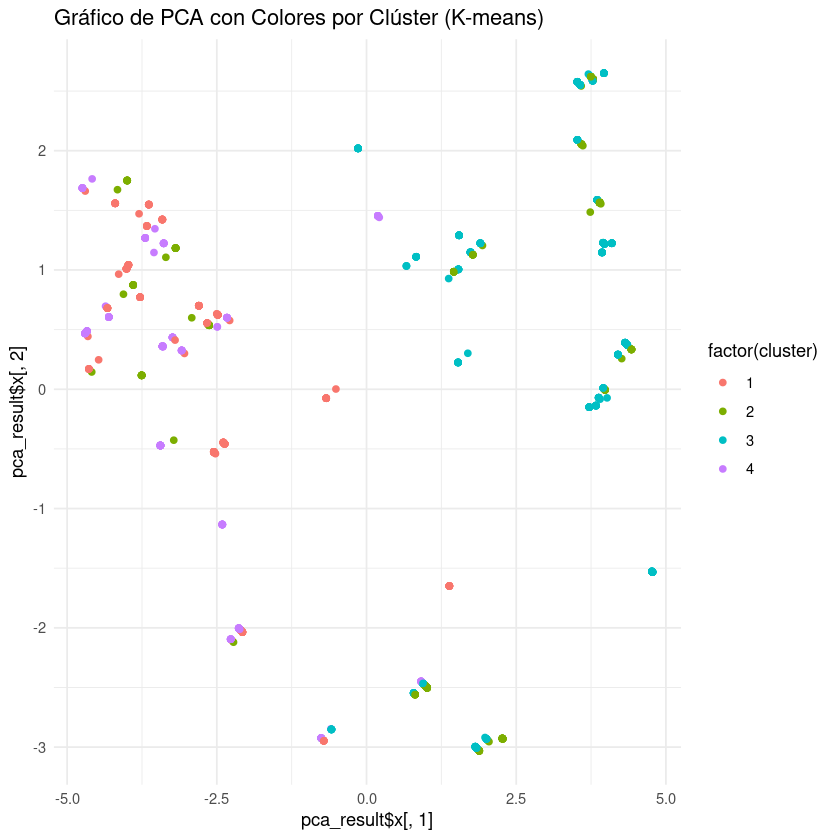

In [ ]:
ggplot(df_with_cluster, aes(x = pca_result$x[, 1], y = pca_result$x[, 2], color = factor(cluster))) +
geom_point() +
labs(title = "Gráfico de PCA con Colores por Clúster (K-means)") +
theme_minimal()

In [ ]:
plot_clusters <- function(data) {
    index <- as.integer(rownames(data))
    x <- pca_result$x[index, 1]
    y <- pca_result$x[index, 2]
    cluster <-  factor(data$cluster, levels = 1:k)
    data_plot <- data.frame(x = x, y = y, cluster = cluster)

    ggplot(data_plot, aes(x = x, y = y, color = cluster, shape = cluster)) +
    geom_point() +
    labs(title = "Gráfico de PCA con Colores por Clúster (K-means) ") +
    theme_minimal()+
    scale_color_manual(values = c("1" = "red", "2" = "blue", "3" = "green", "4" = "purple")) +
    scale_shape_manual(values = c("1" = 1, "2" = 2, "3" = 3, "4" = 4))
    
}

In [ ]:
subset_young <- subset(df_with_cluster, Age >= 14 & Age <= 50)
dim(subset_young)

[1] 866  25

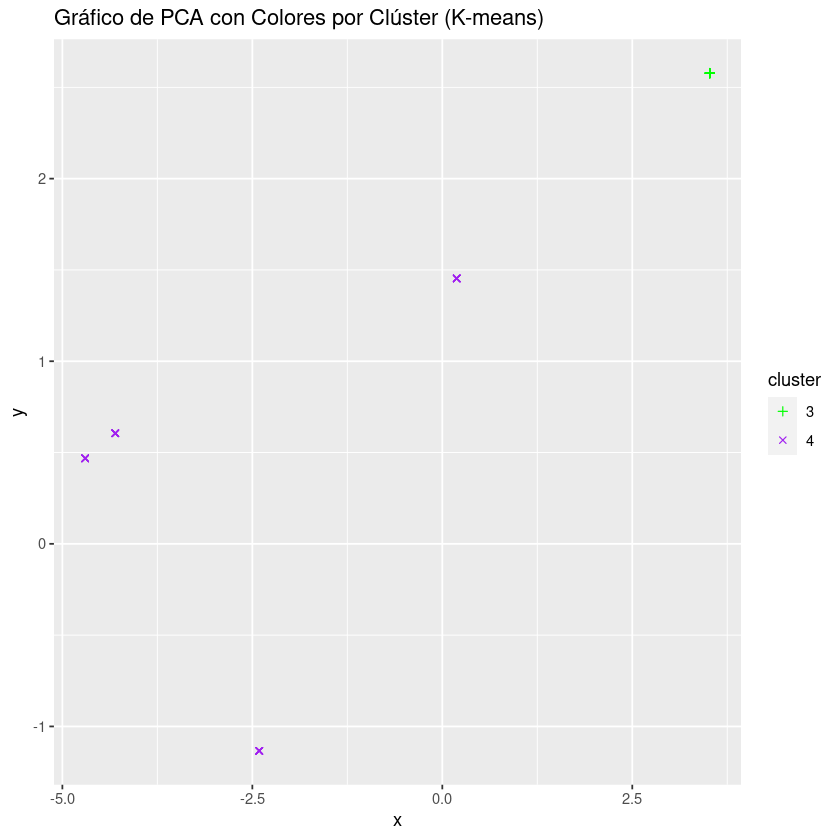

In [ ]:
plot_clusters(subset(df_with_cluster, Age >= 14 & Age <= 18))

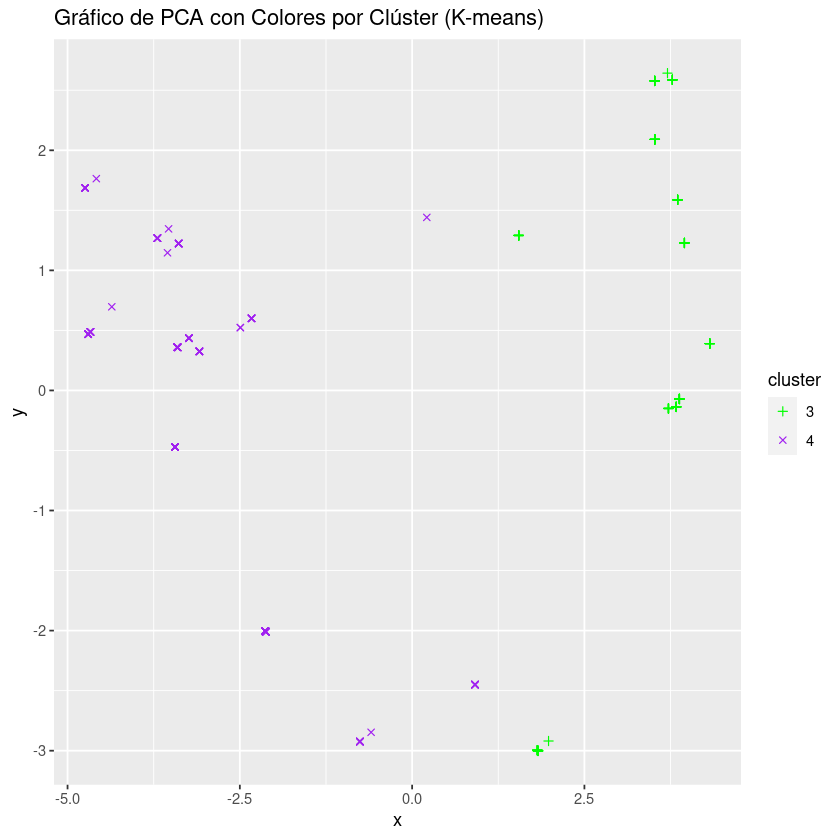

In [ ]:
plot_clusters(subset(df_with_cluster, Age >= 18 & Age <= 30))

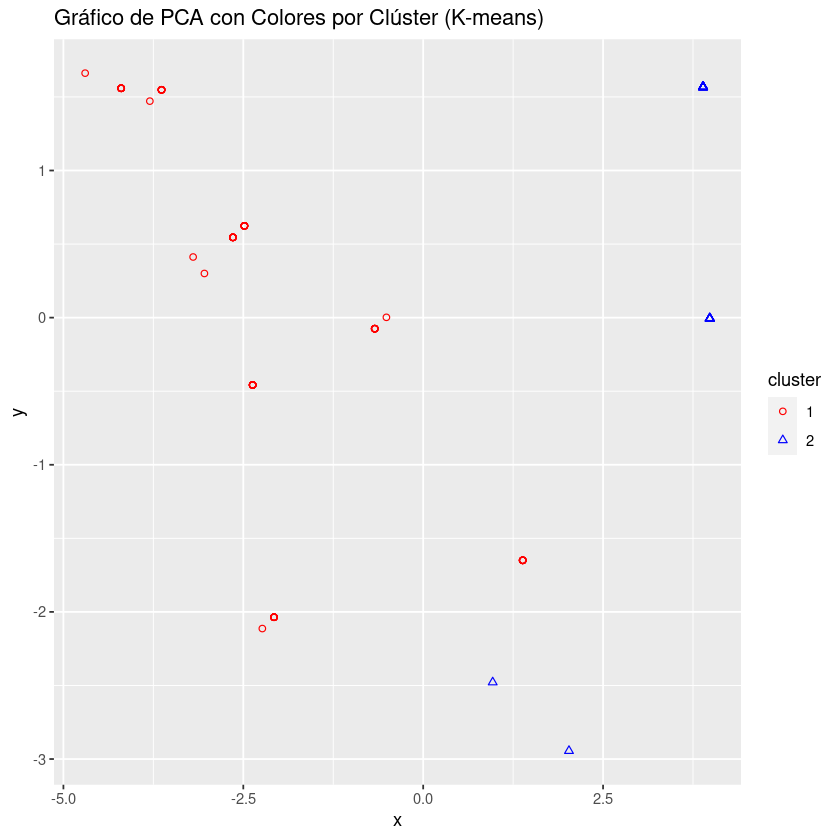

In [ ]:
plot_clusters(subset(df_with_cluster, Age >= 40 & Age <= 45))

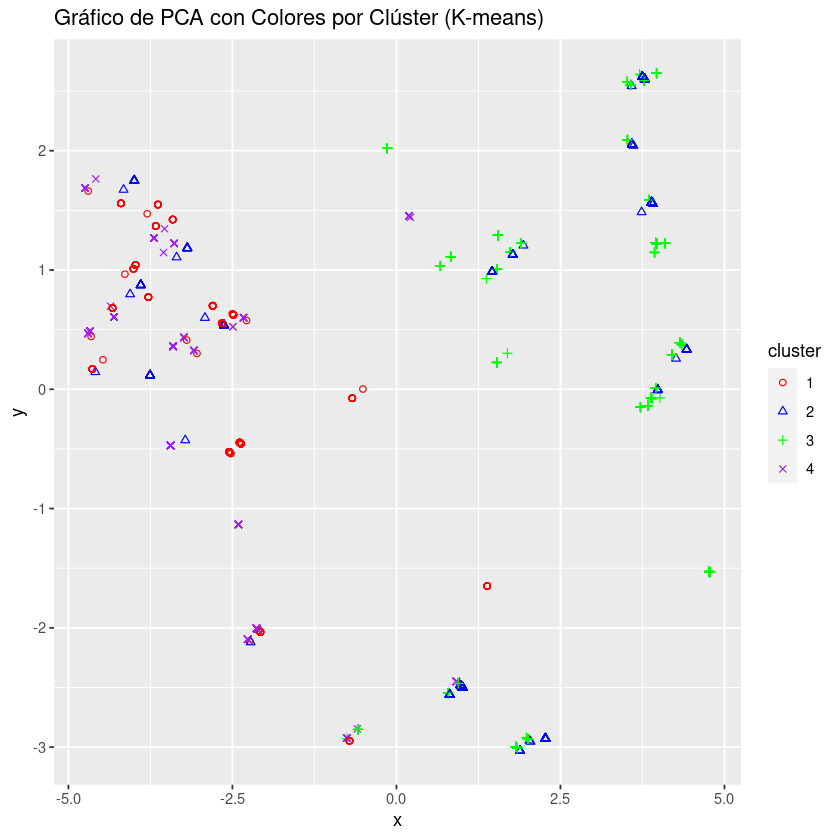

In [ ]:
plot_clusters(df_with_cluster)

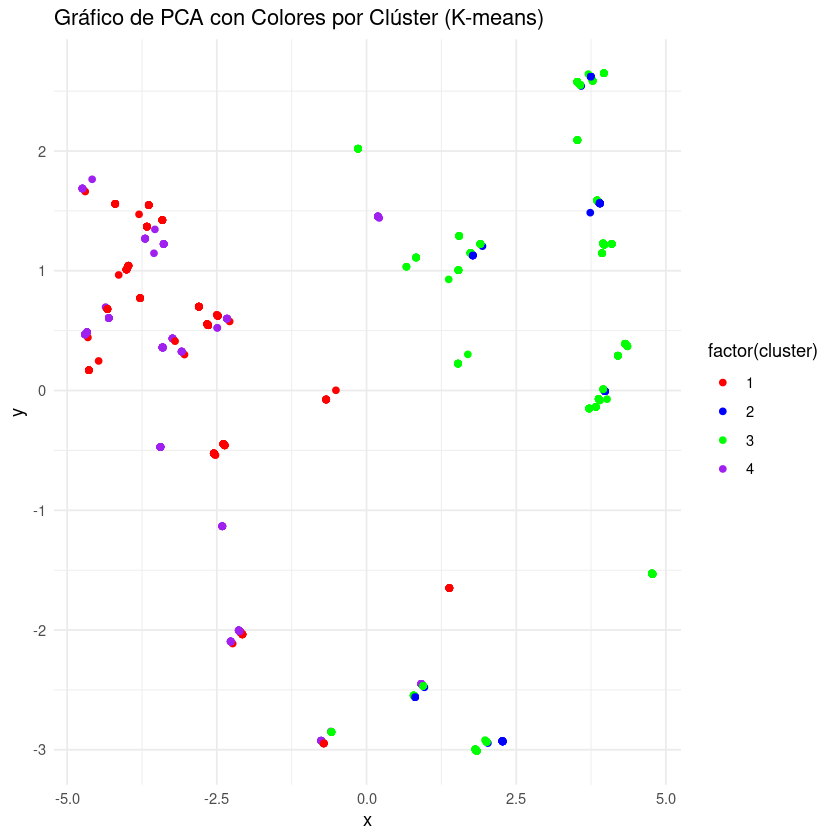

In [ ]:
index <- as.integer(rownames(subset_young))
x <- pca_result$x[index, 1]
y <- pca_result$x[index, 2]
cluster <- subset_young$cluster
data_plot <- data.frame(x = x, y = y, cluster = cluster)

ggplot(data_plot, aes(x = x, y = y, color = factor(cluster))) +
  geom_point() +
  theme_minimal()


# Two feautures

In [ ]:
df_study <- df_with_cluster[, c("Age", "Gender", "cluster")]


In [ ]:
head(df_study)

,Age,Gender,cluster
,<int>,<int>,<int>
1,33,1,1
2,17,1,4
3,35,1,3
4,37,1,3
5,46,1,2
6,35,1,3


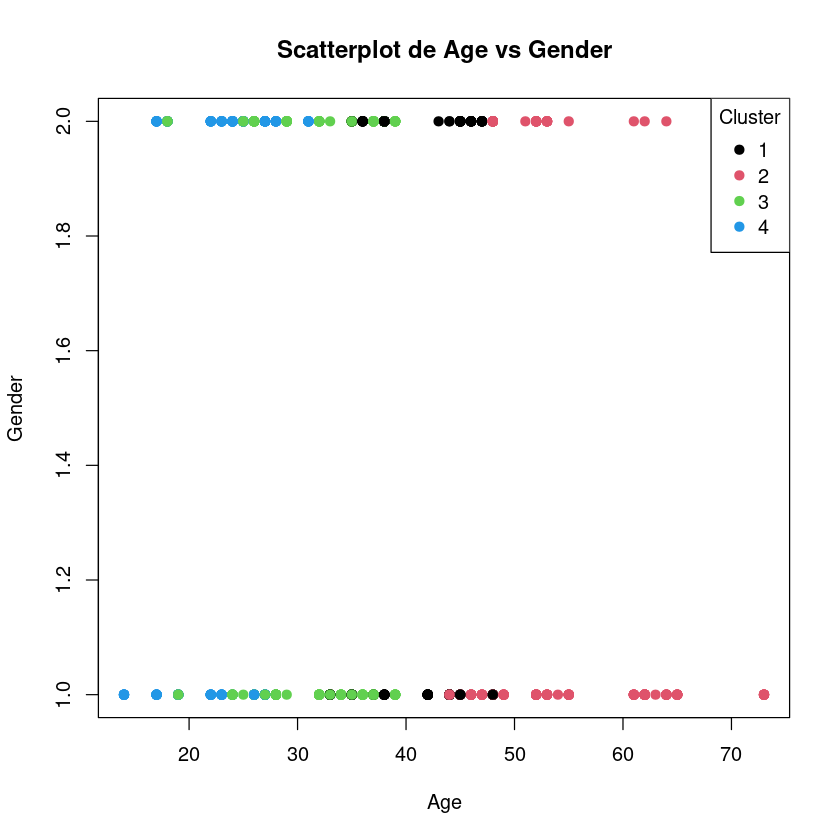

In [ ]:
leyes_vals = 1:k
plot(df_study$Age, df_study$Gender, 
     col = df_study$cluster,  # Cambiar el color en función de la columna "cluster"
     pch = 19,  # Establecer el símbolo de los puntos
     main = "Scatterplot de Age vs Gender",
     xlab = "Age",
     ylab = "Gender") 
     
legend("topright", legend =leyes_vals , col = leyes_vals, pch = 19, title = "Cluster")


# Two with two

In [ ]:
names_df <- names(df)
names_df

[1] "Age"                      "Gender"                  
 [3] "Air.Pollution"            "Alcohol.use"             
 [5] "Dust.Allergy"             "OccuPational.Hazards"    
 [7] "Genetic.Risk"             "chronic.Lung.Disease"    
 [9] "Balanced.Diet"            "Obesity"                 
[11] "Smoking"                  "Passive.Smoker"          
[13] "Chest.Pain"               "Coughing.of.Blood"       
[15] "Fatigue"                  "Weight.Loss"             
[17] "Shortness.of.Breath"      "Wheezing"                
[19] "Swallowing.Difficulty"    "Clubbing.of.Finger.Nails"
[21] "Frequent.Cold"            "Dry.Cough"               
[23] "Snoring"                  "Level"

In [ ]:
sublistas <- list()

tam <- 2

for (i in 1:(length(names_df) - tam + 1)) {
  sublista <- names_df[i:(i + tam - 1)]
  sublistas[[i]] <- sublista
}


In [ ]:
length(sublistas)

[1] 23

`geom_smooth()` using formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'


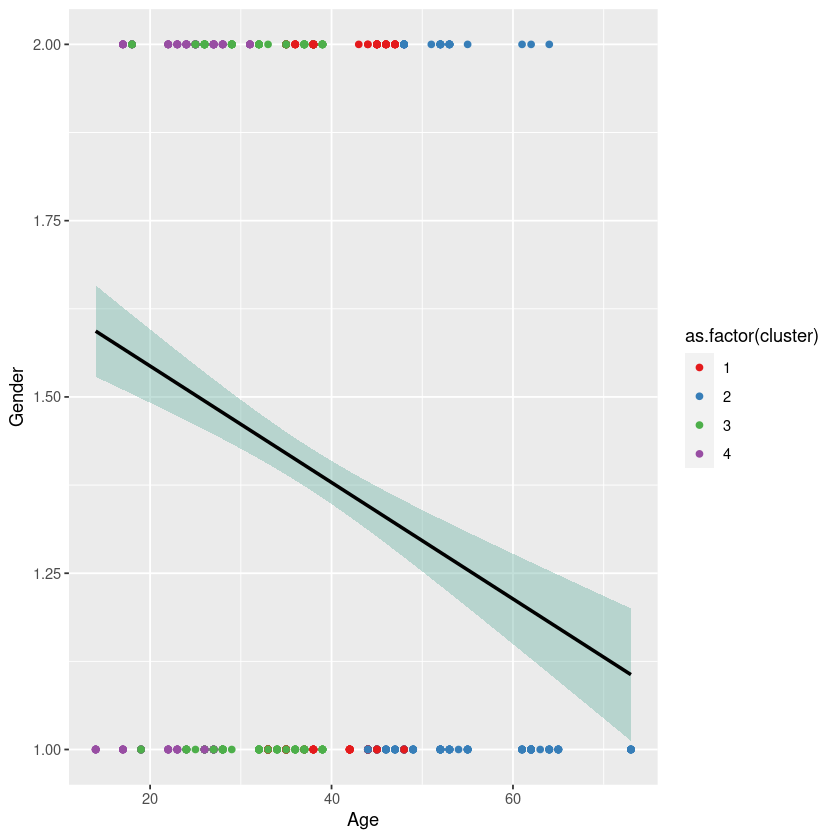

`geom_smooth()` using formula = 'y ~ x'


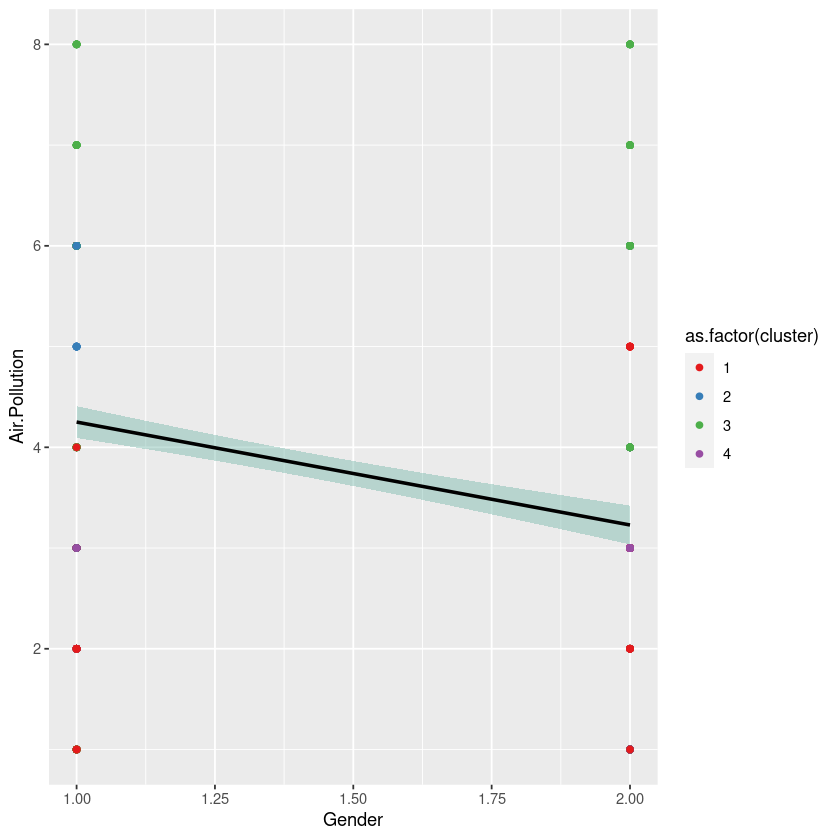

`geom_smooth()` using formula = 'y ~ x'


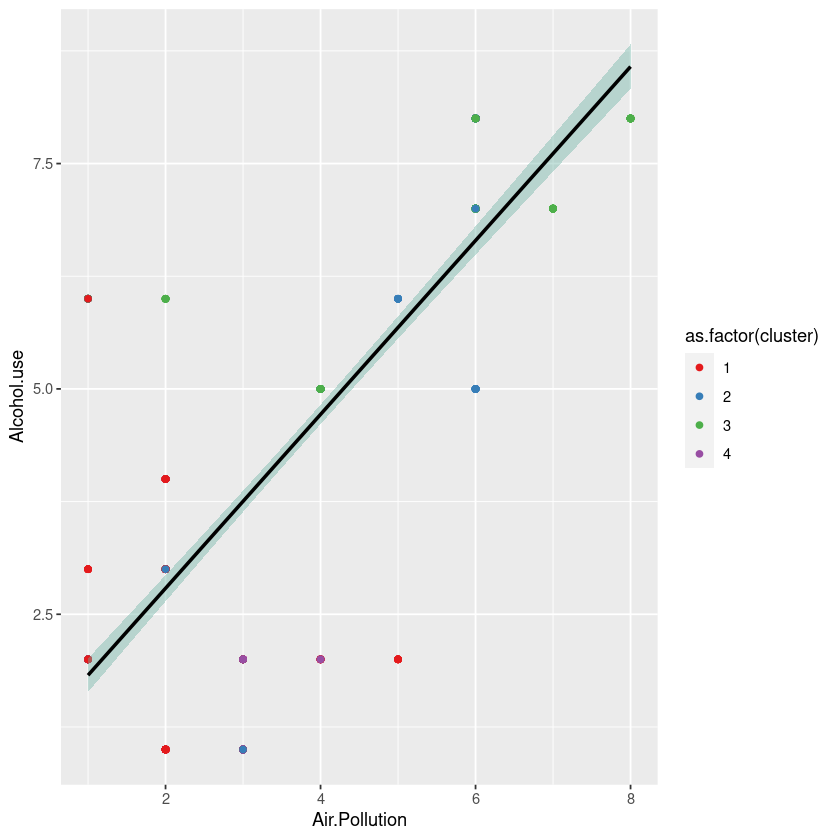

`geom_smooth()` using formula = 'y ~ x'


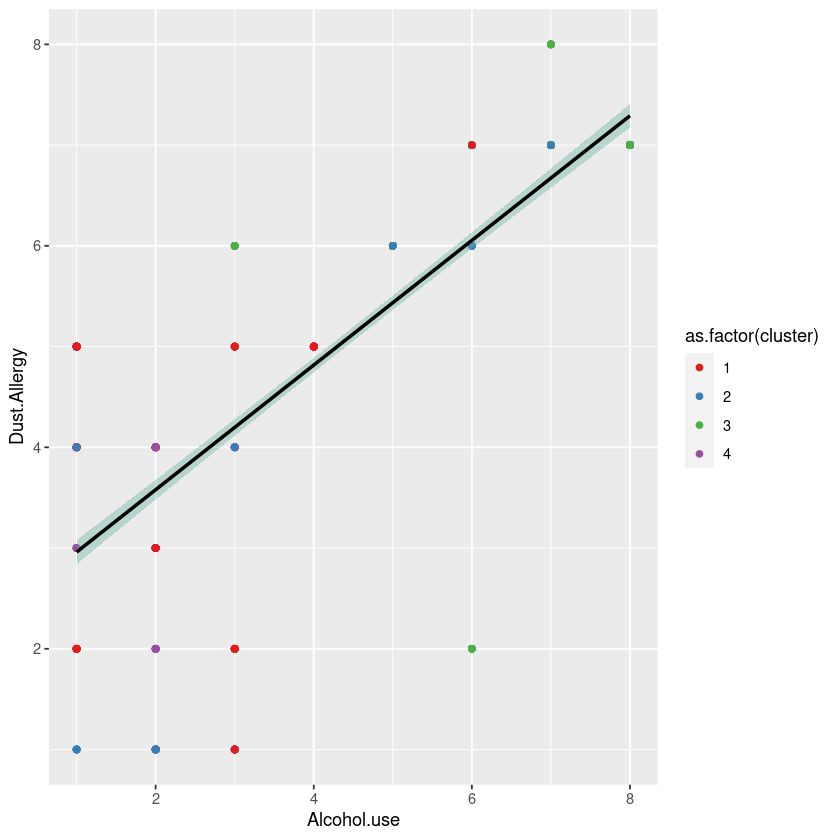

`geom_smooth()` using formula = 'y ~ x'


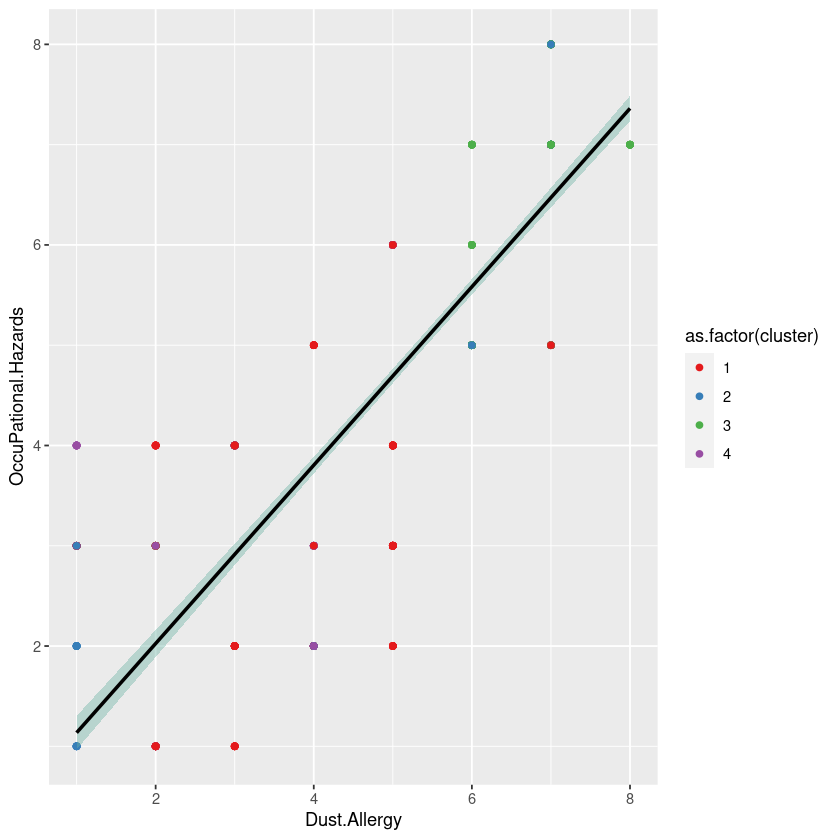

`geom_smooth()` using formula = 'y ~ x'


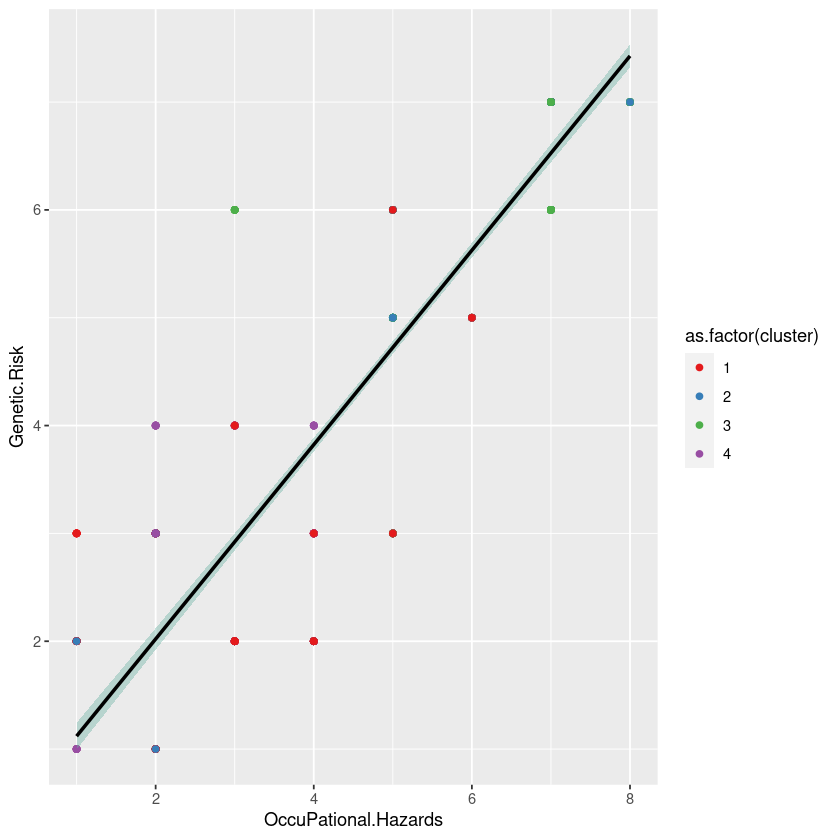

`geom_smooth()` using formula = 'y ~ x'


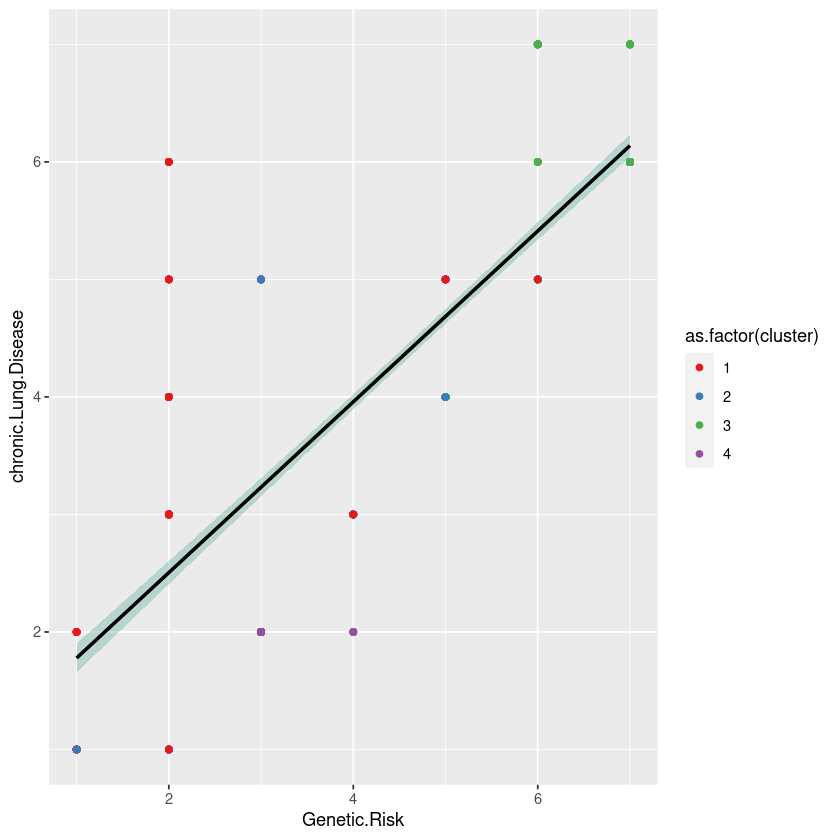

`geom_smooth()` using formula = 'y ~ x'


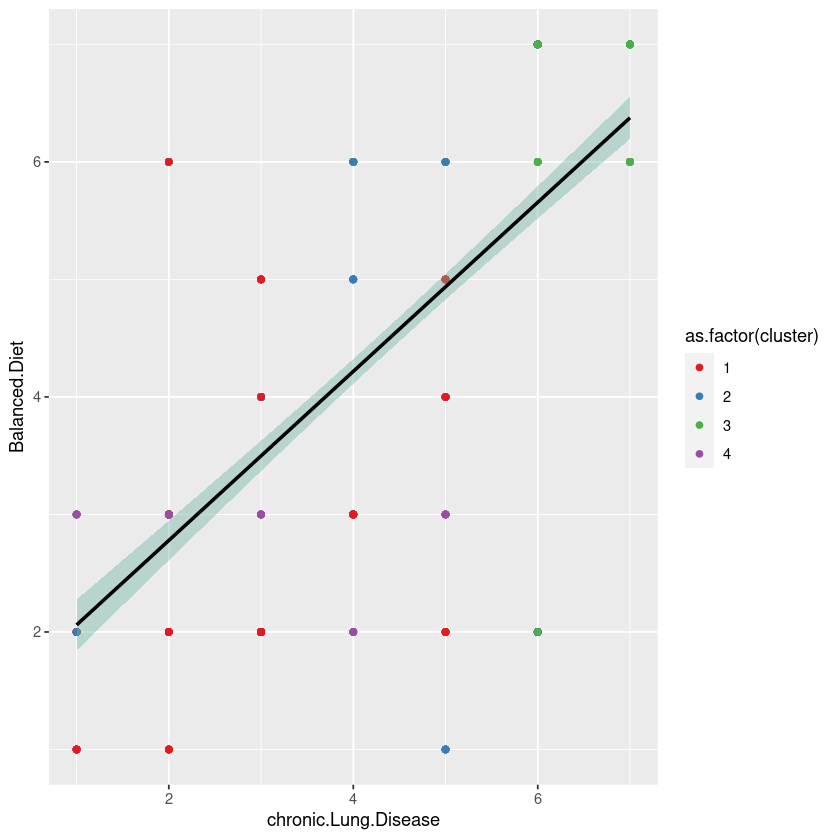

`geom_smooth()` using formula = 'y ~ x'


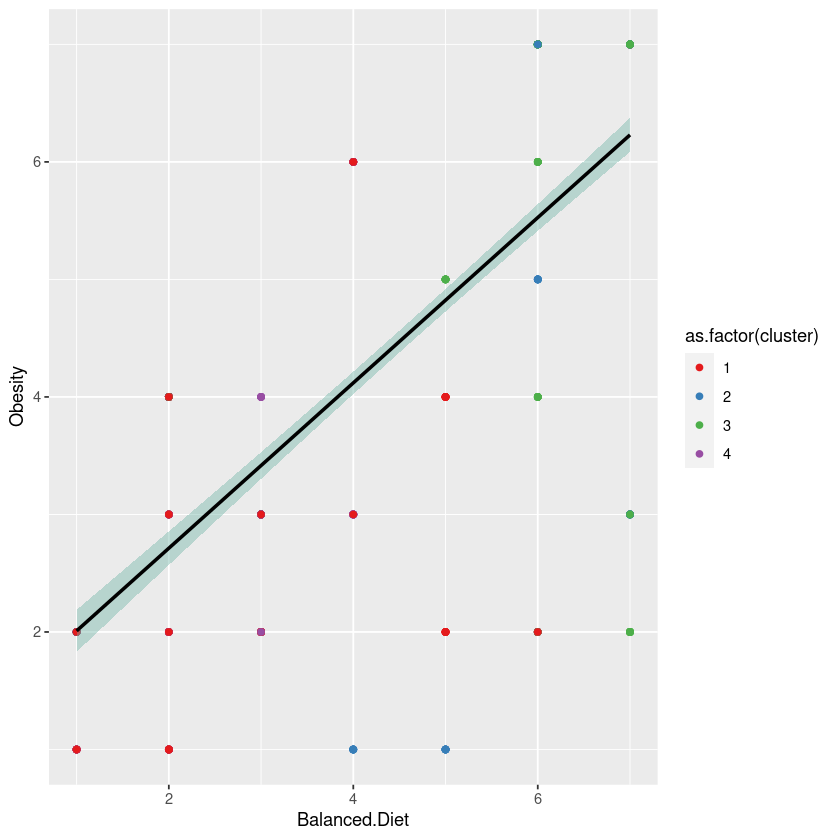

`geom_smooth()` using formula = 'y ~ x'


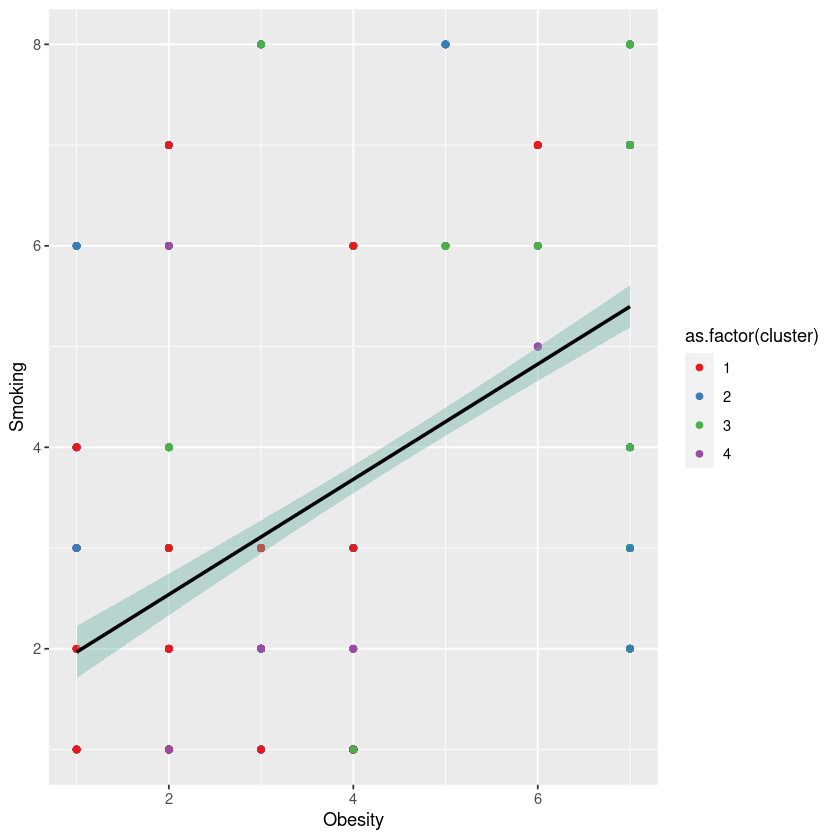

`geom_smooth()` using formula = 'y ~ x'


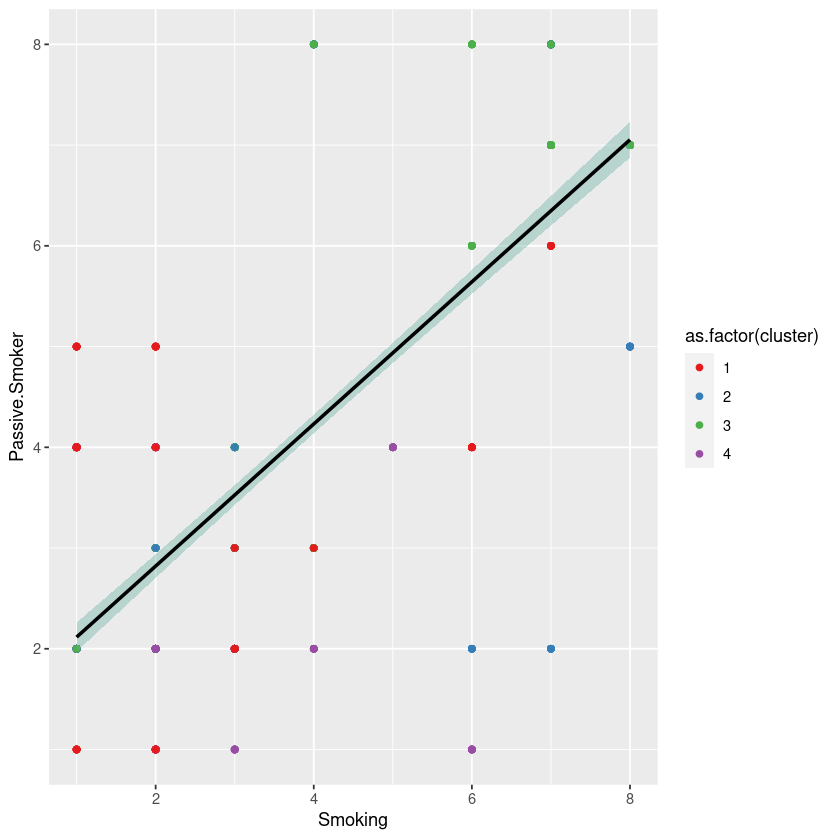

`geom_smooth()` using formula = 'y ~ x'


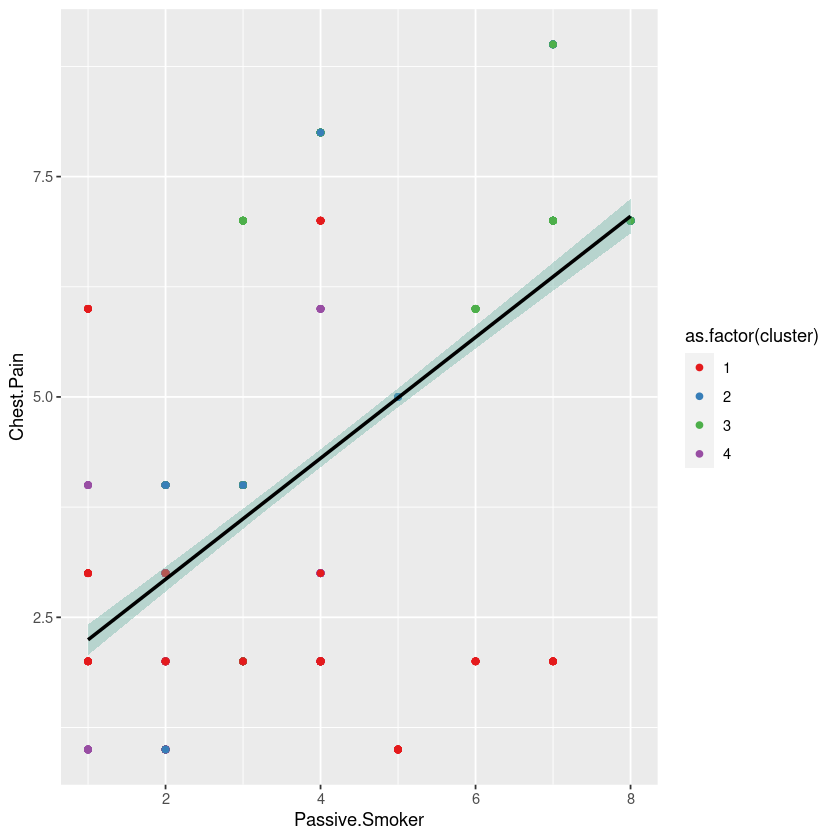

`geom_smooth()` using formula = 'y ~ x'


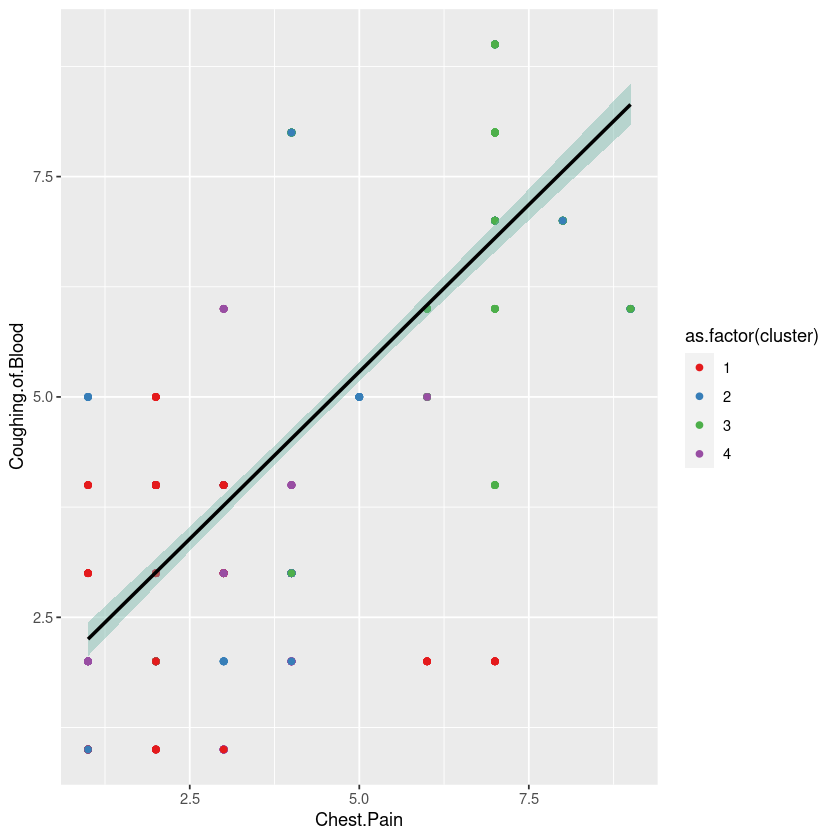

`geom_smooth()` using formula = 'y ~ x'


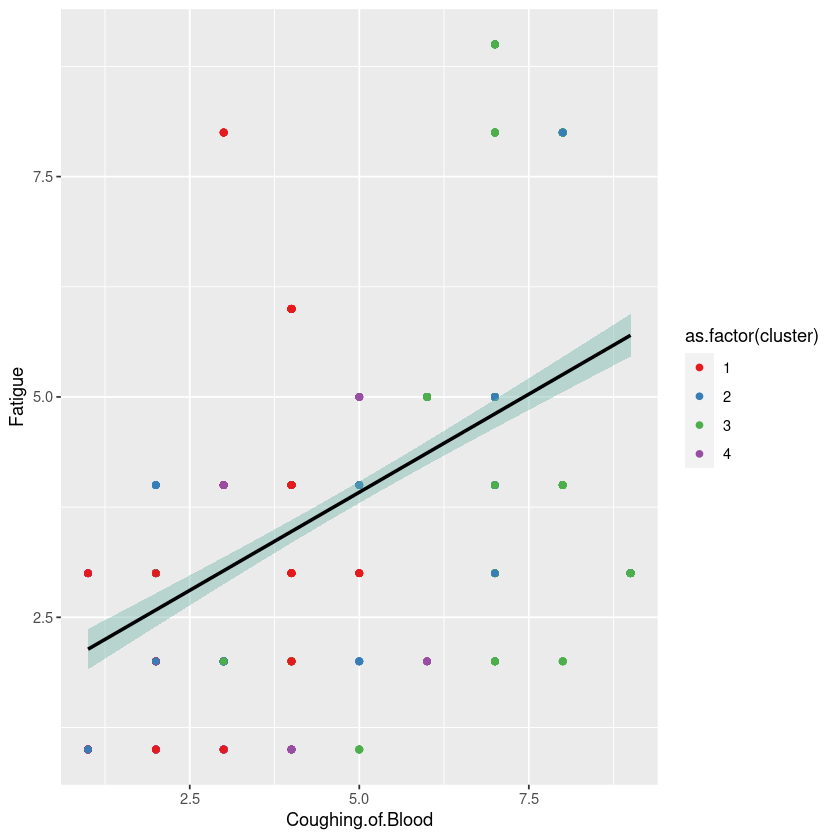

`geom_smooth()` using formula = 'y ~ x'


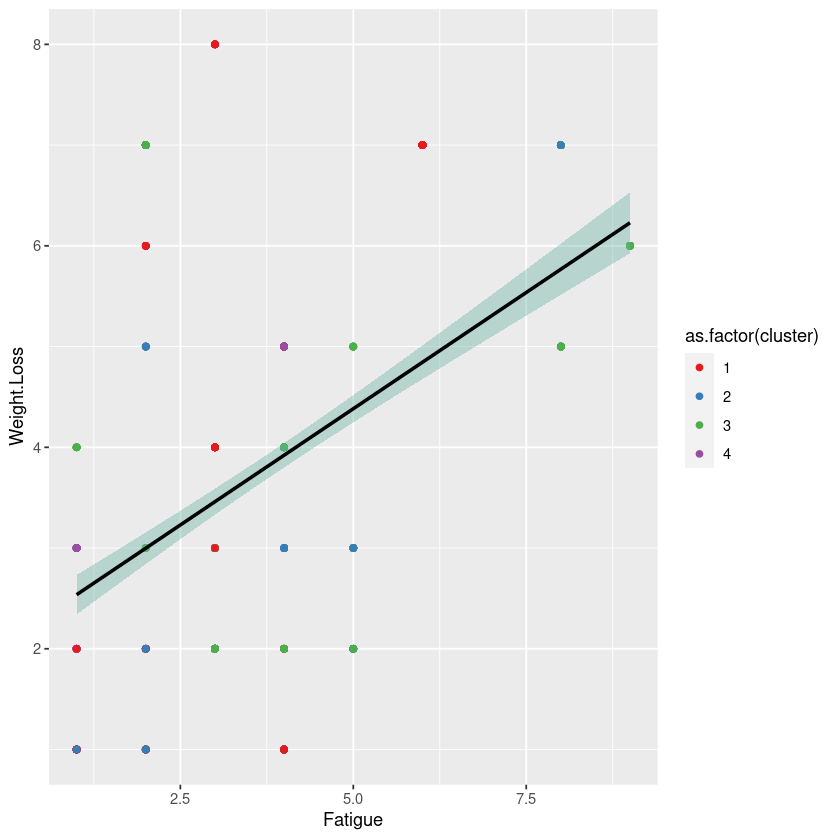

`geom_smooth()` using formula = 'y ~ x'


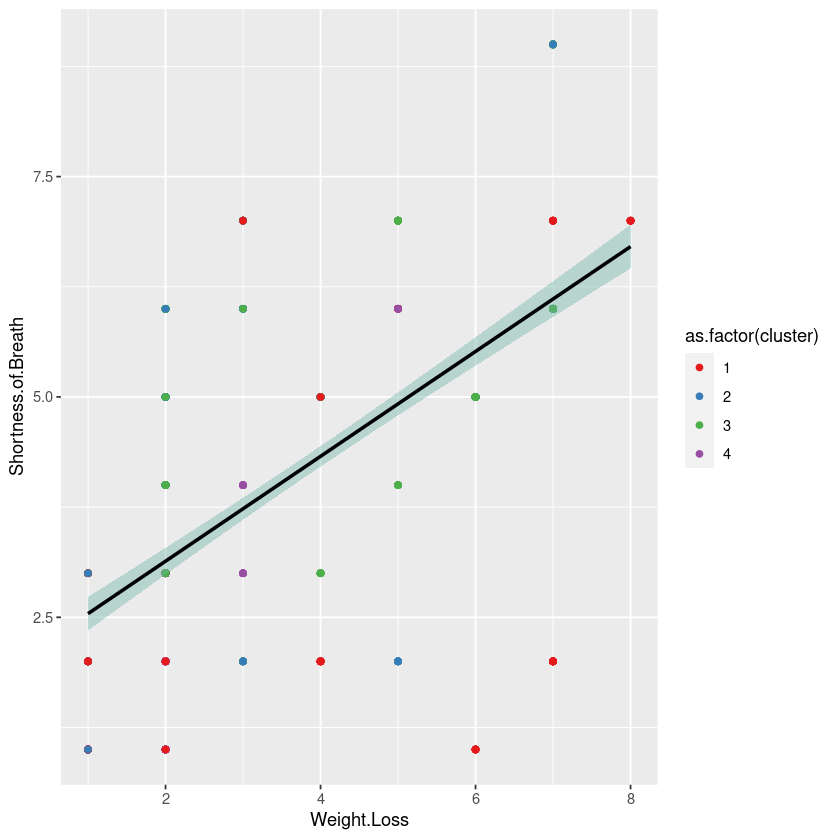

`geom_smooth()` using formula = 'y ~ x'


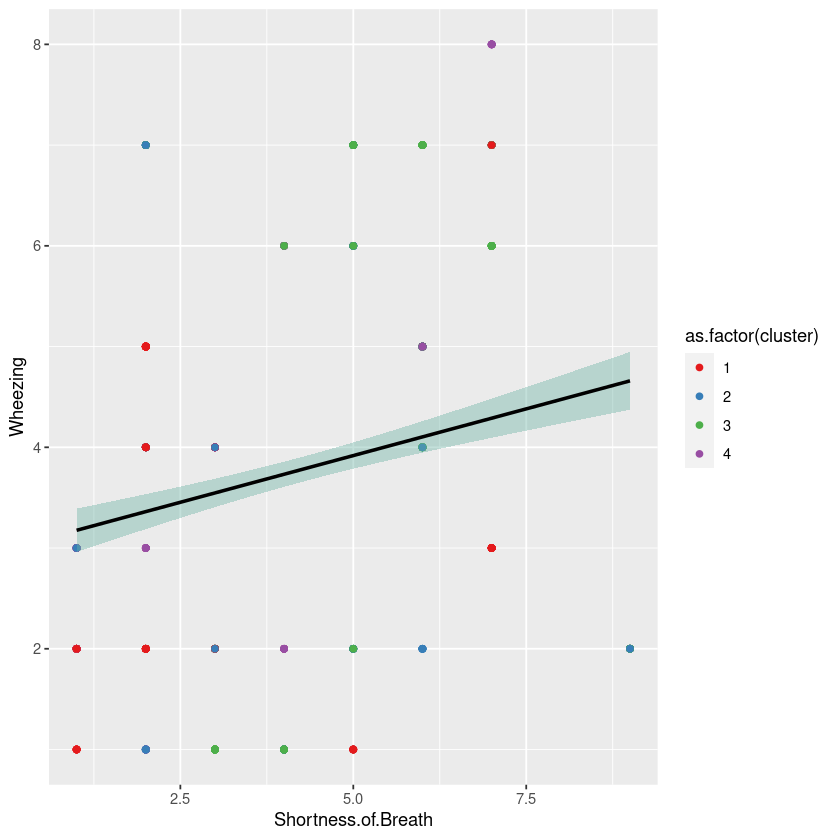

`geom_smooth()` using formula = 'y ~ x'


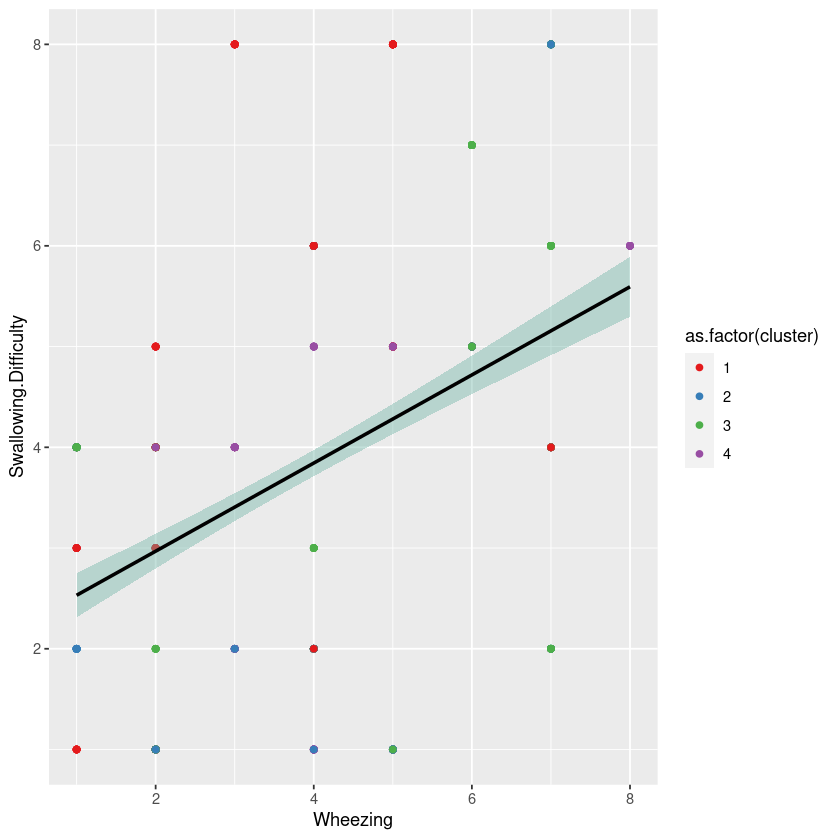

`geom_smooth()` using formula = 'y ~ x'


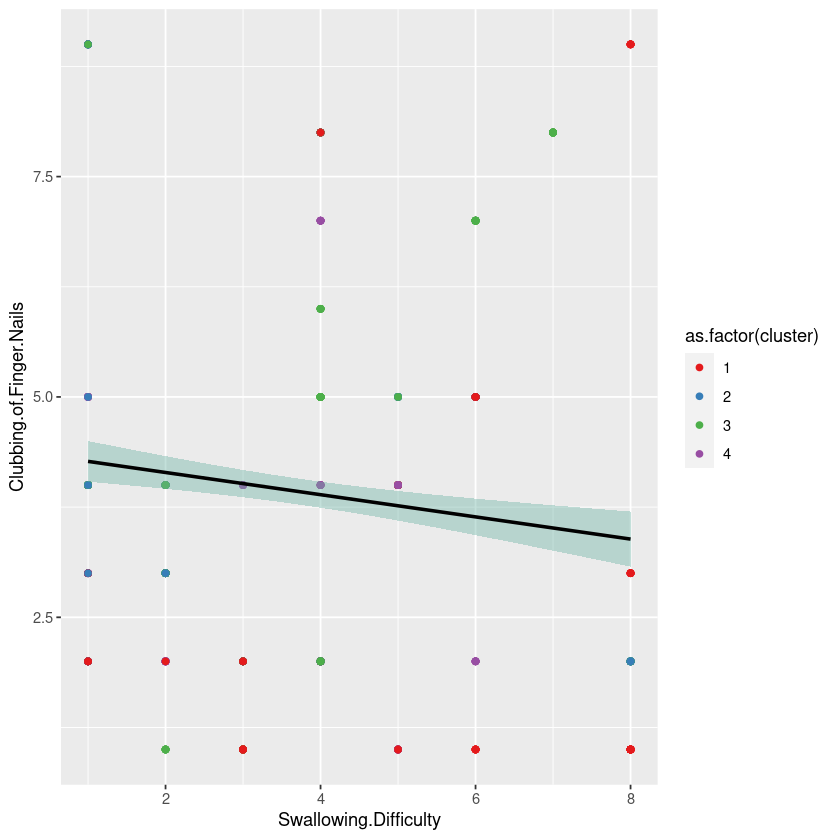

`geom_smooth()` using formula = 'y ~ x'


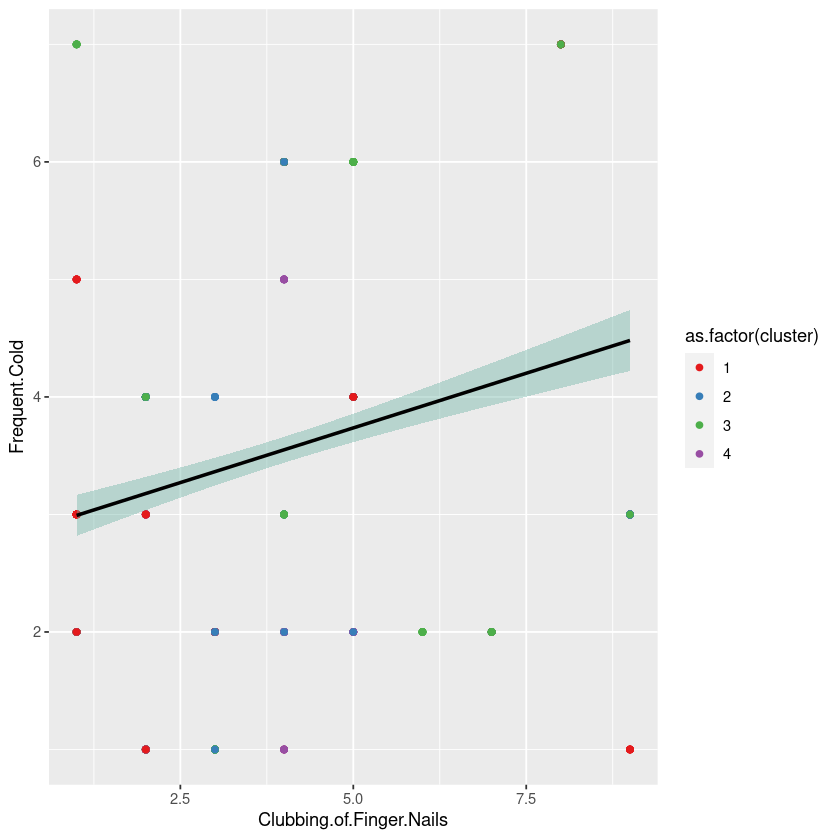

`geom_smooth()` using formula = 'y ~ x'


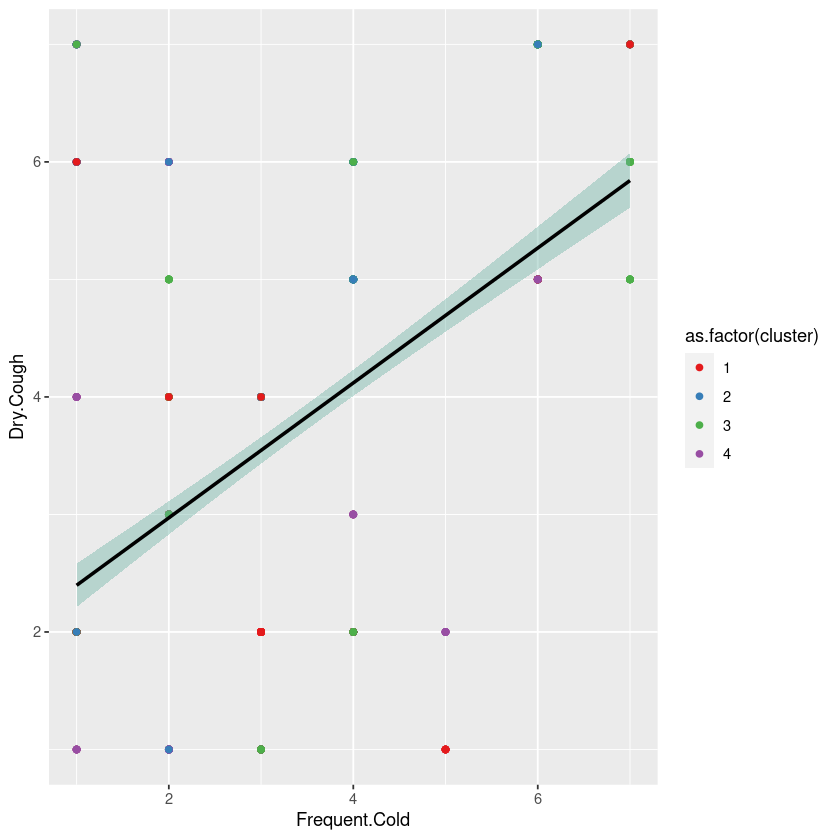

`geom_smooth()` using formula = 'y ~ x'


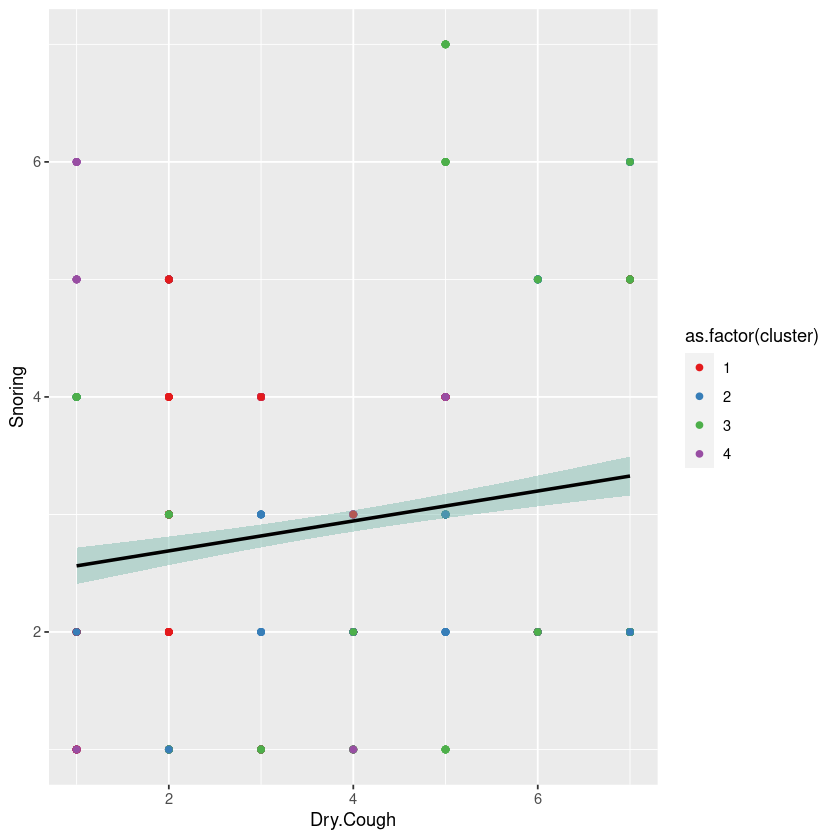

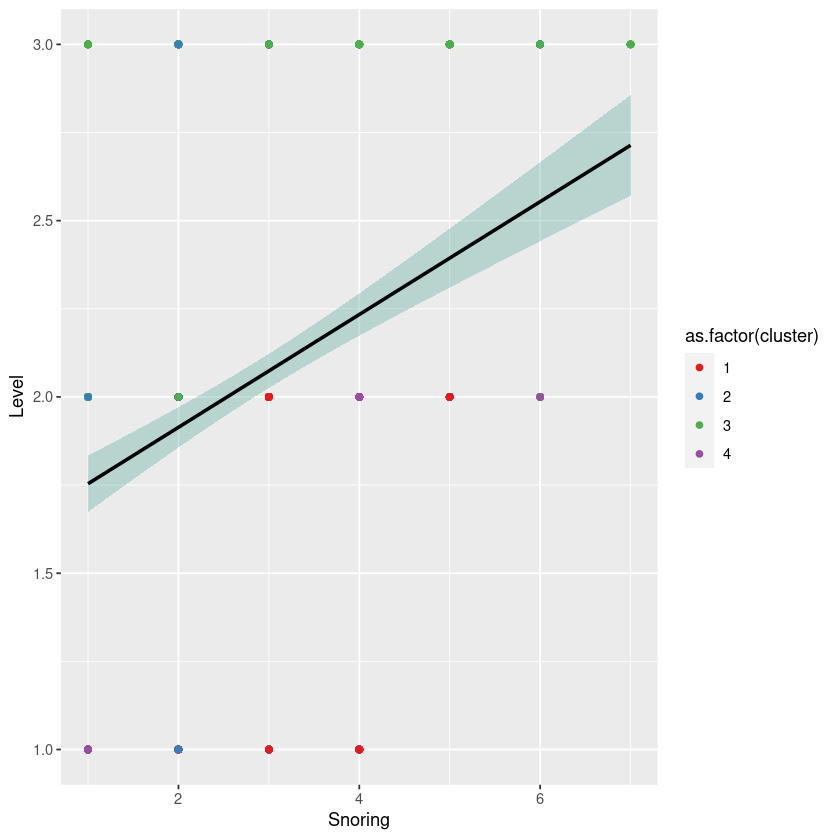

In [ ]:
for (s in sublistas) {

  col1 <- df[, s[1]]
  col2 <- df[, s[2]]

  plt <- ggplot(df_with_cluster, aes(x=col1, y=col2, color=as.factor(cluster))) +
  xlab(s[1]) +  
  ylab(s[2]) +   
  geom_point() +
  scale_color_brewer(palette = "Set1") +
  geom_smooth(method=lm , color="black", fill="#69b3a2", se=TRUE) 


  print(plt)
      
}# Verificar filas duplicadas
duplicates <- df[duplicated(df) | duplicated(df, fromLast = TRUE), ]

# Imprimir las filas duplicadas
print(duplicates)